# Homework 3: 
## Riccardo Tancredi - riccardo.tancredi@studenti.unipd.it
---
1. Choose a given type of ecological structure (e.g. mutualistic, or predator-prey, or etc...). Generate random matrices for completely random and for the chosen ecological structures. You need to create SxS matrices (S is the number of species) with C non-zero entries and 1-C zeros (C is the connectivity between 0 and 1). The non-zero elements are drawn at random from given distributions. Depending on the network structure some symmetries and constraints may hold. Please follow the detailed step-by-step explanation in the "Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf" (Also uploaded in the Google Drive, note folder). Fix C and for S=20, 50, 100, 200 calculate the eigenvalues of the matrix and plot them against Real part (x-axis) and imaginary part (y-axis).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
S = 200     # number of species
d = 4       # self interaction
C = 0.6     # level of connectance
sigma = 1   # standard deviation
np.random.seed(3)

In [3]:
def random_generate_M(S):    
    # Generate M
    M = np.zeros(shape=(S, S))
    for i in range(S):
        mask = np.random.uniform(size=S) <= C
        M[i, :][mask] = np.random.normal(loc=0, scale=sigma, size=sum(mask))
    np.fill_diagonal(M, -d)

    eigenval, _ = np.linalg.eig(M)
    return eigenval

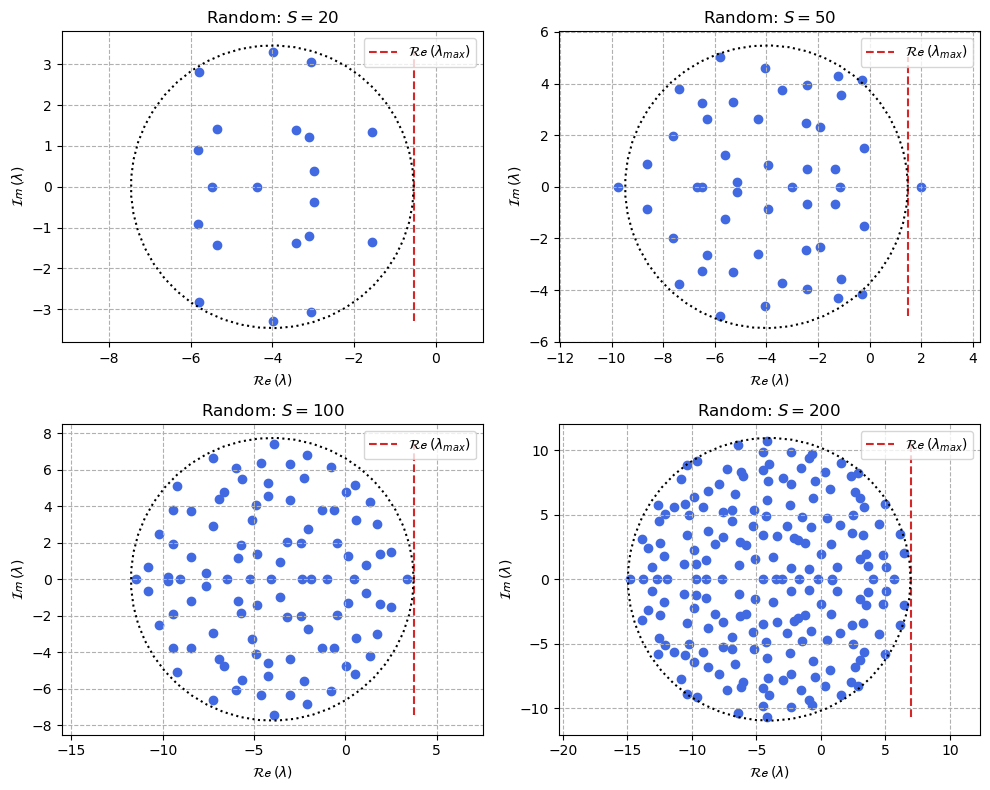

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
all_eigs_random = []
for k, S in enumerate([20, 50, 100, 200]):
    eig = random_generate_M(S)
    all_eigs_random.append(eig)
    i, j = bin(k).split('b')[-1].zfill(2)
    ax[int(i), int(j)].scatter(np.real(eig), np.imag(eig), color='royalblue')
    ax[int(i), int(j)].set_title(f'Random: '+r'$S='+f'{S}'+r'$')
    ax[int(i), int(j)].set_xlabel(r'$\mathcal{Re}\:(\lambda)$')
    ax[int(i), int(j)].set_ylabel(r'$\mathcal{Im}\:(\lambda)$')
    ax[int(i), int(j)].vlines(-d+sigma*np.sqrt(S*C), min(np.imag(eig)), 
                              max(np.imag(eig)), ls='--', 
                              color='tab:red', label=r'$\mathcal{Re}\:(\lambda_{max})$')
    ax[int(i), int(j)].plot(-d+np.sqrt(S*C)*sigma*np.cos(np.linspace(0, 2*np.pi)), 
                            np.sqrt(S*C)*sigma*np.sin(np.linspace(0, 2*np.pi)), 
                            ls=':', color='k')
    ax[int(i), int(j)].grid(ls='--')
    ax[int(i), int(j)].legend()
    ax[int(i), int(j)].axis('equal')
plt.tight_layout()
plt.show()

The eigenvalues are plotted accordingly to what is the described in the Allesina paper. The eigenvalues live in the ellipse of axis $a = -d +\sigma\sqrt{SC}$ and $b = \sigma\sqrt{SC} $, where $d$ represents the self interaction term, $S$ the total number of species and $C$ the connectance probability between species.

Sometimes it happens that some points are outside the ellipse in the above plots and due to the low value of S: as S increases, the ellipses are more defined and populated.

[]

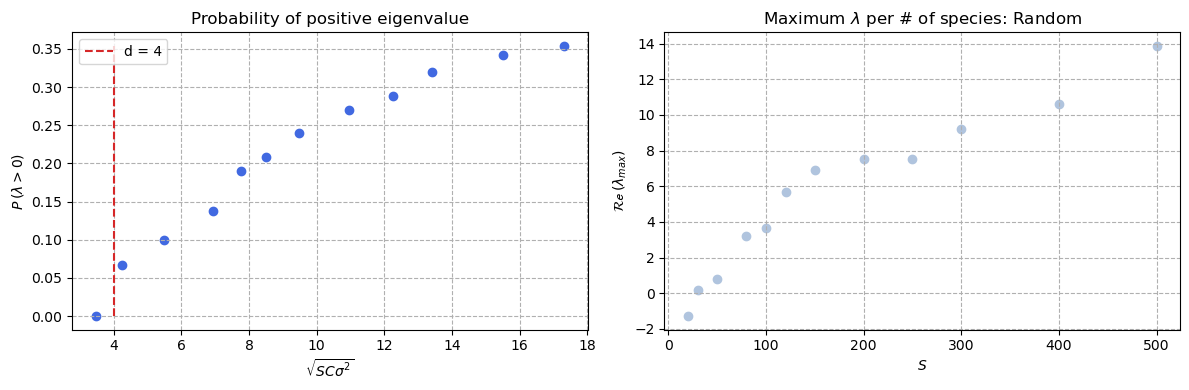

In [5]:
SS = np.array([20, 30, 50, 80, 100, 120, 150, 200, 250, 300, 400, 500])
maxes = []
probs = []
for S in SS:
    eig = random_generate_M(S)
    maxes.append(max(np.real(eig))) 
    probs.append(sum(np.real(eig) > 0)/len(eig))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].scatter(sigma*np.sqrt(SS*C), probs, marker='o', color='royalblue')
ax[0].set_title(f'Probability of positive eigenvalue')
ax[0].set_xlabel(r'$\sqrt{SC\sigma^2}$')
ax[0].set_ylabel(r'$P\:(\lambda>0)$')
ax[0].vlines(d, min(probs), max(probs), color='tab:red', ls='--', label=f'd = {d}')
ax[0].grid(ls='--')
ax[0].legend()

ax[1].scatter(SS, maxes, marker='o', color='lightsteelblue')
ax[1].set_title('Maximum '+r'$\lambda$'+f' per # of species: Random')
ax[1].set_xlabel(r'$S$')
ax[1].set_ylabel(r'$\mathcal{Re}\:(\lambda_{max})$')
ax[1].grid(ls='--')

plt.tight_layout()
plt.plot() 

These plots show the behaviour of eigenvalues in the random case. The probability of positive eigenvalues increases as $S$ increases: the above left plot emphasizes that the probability of finding points such that $\sqrt{SC\sigma^2}-d<0$ holds is very poor.

The right plot highlights how the real part of the maximum eigenvalue $\mathcal{Re}(\lambda_{max})$ scales as $\propto \sqrt{S}$.

## Predator - Prey

In [6]:
def pred_pray_M(S):
    # Predator - Prey case
    M = np.zeros(shape=(S,S))
    rho = []
    for i in range(S):
        for j in range(i):
            p1 = np.random.uniform(size=1)
            if p1 <= C:
                p2 = np.random.uniform(size=1)
                if p2 <= 0.5:
                    M[i, j] = abs(np.random.normal(loc=0, scale=sigma))
                    M[j, i] = -abs(np.random.normal(loc=0, scale=sigma))
                    rho.append(M[i, j]*M[j, i])
                else:
                    M[i, j] = -abs(np.random.normal(loc=0, scale=sigma))
                    M[j, i] = abs(np.random.normal(loc=0, scale=sigma))
                    rho.append(M[i, j]*M[j, i])    
            else:
                M[i, j], M[j, i] = [0, 0]
                rho.append(M[i, j]*M[j, i])
    np.fill_diagonal(M, -d)
    
    eigenval, _ = np.linalg.eig(M)
    return eigenval 

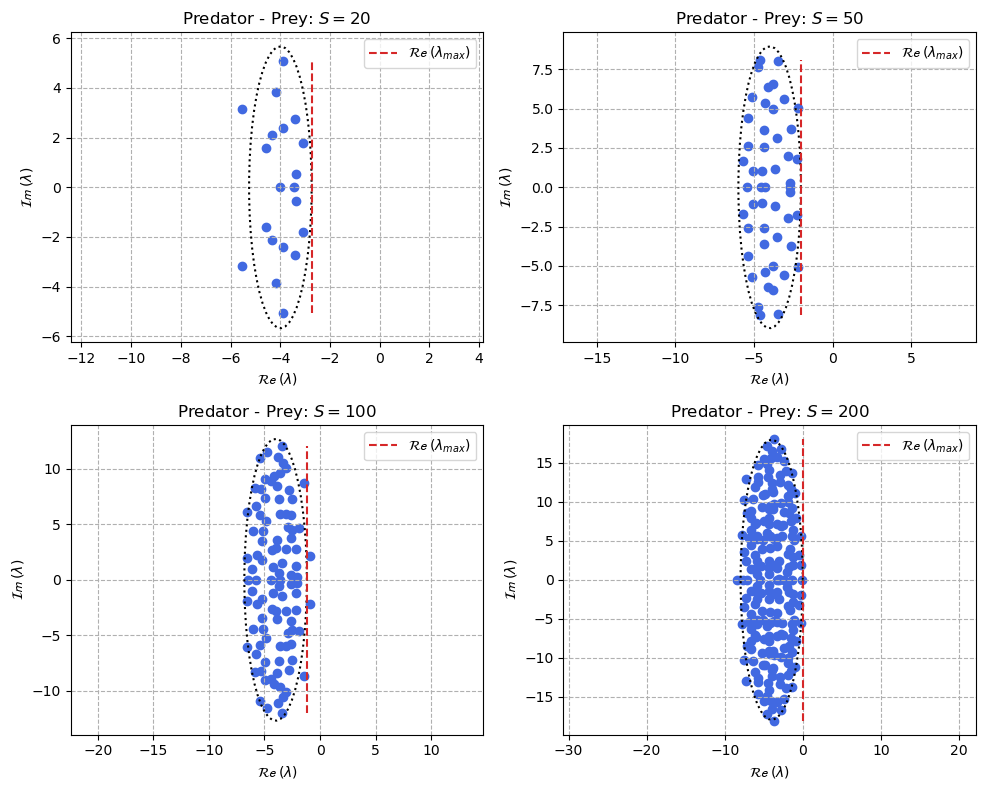

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
rho = 2/np.pi
for k, S in enumerate([20, 50, 100, 200]):
    eig = pred_pray_M(S)
    i, j = bin(k).split('b')[-1].zfill(2)
    ax[int(i), int(j)].scatter(np.real(eig), np.imag(eig), color='royalblue')
    ax[int(i), int(j)].set_title(f'Predator - Prey: '+r'$S='+f'{S}'+r'$')
    ax[int(i), int(j)].set_xlabel(r'$\mathcal{Re}\:(\lambda)$')
    ax[int(i), int(j)].set_ylabel(r'$\mathcal{Im}\:(\lambda)$')
    ax[int(i), int(j)].plot(-d+np.sqrt(S*C)*sigma*(1-rho)*np.cos(np.linspace(0, 2*np.pi)), 
                            np.sqrt(S*C)*(1+rho)*sigma*np.sin(np.linspace(0, 2*np.pi)), 
                            ls=':', color='k')
    ax[int(i), int(j)].vlines(-d+sigma*np.sqrt(S*C)*(1-rho), min(np.imag(eig)), 
                              max(np.imag(eig)), ls='--', 
                              color='tab:red', label=r'$\mathcal{Re}\:(\lambda_{max})$')
    ax[int(i), int(j)].grid(ls='--')
    ax[int(i), int(j)].axis('equal')
    ax[int(i), int(j)].legend()
plt.tight_layout()
plt.show()

In the Predator - Prey case, the eigenvalues plotted live in the ellipse of axis $a = -d +\sigma\sqrt{SC}(1+\rho)$ and $b = \sigma\sqrt{SC}(1-\rho)$, where $\rho = -\frac{\mathbb{E}^2(|x|)}{\sigma^2}$. 

Since we are dealing with Gaussian random variables, it can be proven that $\mathbb{E}(|x|) = \sqrt{\frac{2}{\pi}}\sigma$, so 
\begin{equation}
    \rho = -\frac{2}{\pi}
\end{equation}

As S increases, the ellipses are more defined and populated.

3. For case 2. plot the maximum real part eigenvalues for each $S$ $\big(Max\{\mathcal{Re}(\lambda(S))\}\big)$ as a function of S and the probability of $P(\lambda >0)$ as a function of the proper control parameter $\big($ e.g. for the complete random case is $\sigma\cdot\sqrt{S\:C}$ $\big)$. Compare these plots with the one for the complete random case (the original May case).

[]

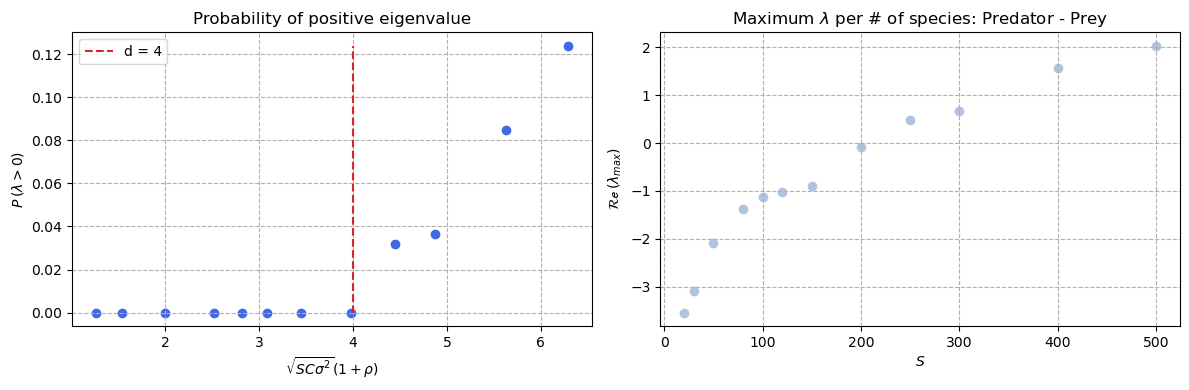

In [8]:
SS = np.array([20, 30, 50, 80, 100, 120, 150, 200, 250, 300, 400, 500])
maxes = []
probs = []
for S in SS:
    eig = pred_pray_M(S)
    maxes.append(max(np.real(eig))) 
    probs.append(sum(np.real(eig) > 0)/len(eig))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].scatter(sigma*np.sqrt(SS*C)*(1-rho), probs, marker='o', color='royalblue')
ax[0].set_title(f'Probability of positive eigenvalue')
ax[0].set_xlabel(r'$\sqrt{SC\sigma^2}(1+\rho)$')
ax[0].set_ylabel(r'$P\:(\lambda>0)$')
ax[0].vlines(d, min(probs), max(probs), color='tab:red', ls='--', label=f'd = {d}')
ax[0].grid(ls='--')
ax[0].legend()

ax[1].scatter(SS, maxes, marker='o', color='lightsteelblue')
ax[1].set_title('Maximum '+r'$\lambda$'+f' per # of species: Predator - Prey')
ax[1].set_xlabel(r'$S$')
ax[1].set_ylabel(r'$\mathcal{Re}\:(\lambda_{max})$')
ax[1].grid(ls='--')

plt.tight_layout()
plt.plot() 

In the Predator - Prey case, the probability of positive eigenvalues is smaller than the random case: the above left plot emphasizes that the probability of having eigenvalues such that $\sqrt{SC\sigma^2}(1+\rho)-d<0$ is higher than the simple random case, satisfying the stability criterium.

The right plot highlights how the real part of the maximum eigenvalue $\mathcal{Re}(\lambda_{max})$ scales as $\propto \sqrt{S}$, with more cases in which $\mathcal{Re}(\lambda_{max})<0$, with respect to the simple random case. 

4. Optional: how the eigenvalues of the Jacobian of a GLV with constant growth rate set to $1$ and random positive $N_i^\star$ (for example taken from a Uniform distribution between 1 and 10) and random interactions are distributed? Does the circular or elliptic law still hold? And what about the stability-complexity paradox?

I expect the circular law to hold since the Jacobian matrix is a random matrix, similar to the previous case discussed.

The elements of the Jacobian matrix are $J_{ij} = N_i^\star \alpha_{ij}$, where $N_i^\star$ are sampled from a uniform distribution of mean $\mathbb{E}(x) = 5.5$ and variance $Var(x) = 8.25$. 

The diagonal elements are $J_{ii} = -1$ since we are assuming a constant growth rate equal to 1 for each species.

In [9]:
def Jacobian_GLV(S):
    # Mutualistic case
    J = np.zeros(shape=(S, S))
    # Stationary condition for the populations 
    N = np.random.randint(low=1, high=11, size=S) 
    for i in range(S):
        for j in range(i):
            p = np.random.uniform(size=1)
            if p <= C:
                J[i, j] = np.random.normal(loc=0, scale=sigma) * N[i]
                J[j, i] = np.random.normal(loc=0, scale=sigma) * N[j]
    np.fill_diagonal(J, -1)

    return J

The entries of the Jacobian matrix are obtained such that $\displaystyle\sum_{j=1}^S m_{ij}=\rho_i$. Then, 
\begin{equation*}
    \displaystyle\sum_{j=1}^S \mathbb{E}(m_{ij})= \mathbb{E}\biggl(\displaystyle\sum_{j=1}^S m_{ij}\biggr) = \rho \sim -d + (S-1)\overline{E}
\end{equation*}
where $d \overset{!}{=} 1$ and $\overline{E} = \mathbb{E}(m_{ij})$ is the mean of the product of the two distribution used: $\mathcal{N}(0, \sigma^2)*U(1, 10)$.

From the generalization of the circular law theory, the highest eigenvalue can be found at $\mathcal{Re}(\lambda_{max}) \simeq -d -\overline{E} + \sqrt{S\cdot Var(J)}$, where $\overline{E}$ can be easily computed, as well as $Var(J)$ which is related to the radius of the disk containing all the $S$ eigenvalues: $r \overset{S\gg 1}{\simeq} \sqrt{S\cdot Var(J)}$. The center of disk is set at $(-d-\overline{E}, \:0)$.  

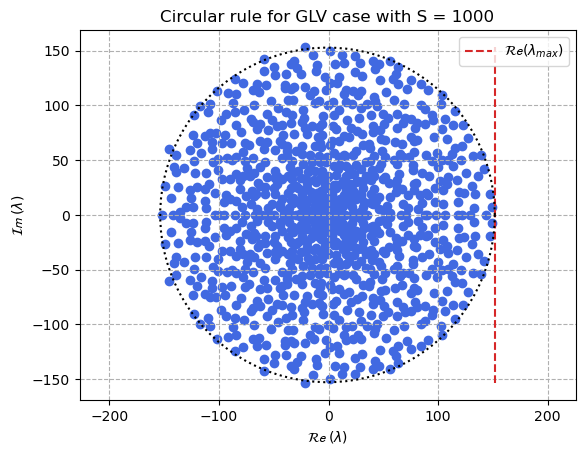

In [10]:
S = 1000
J = Jacobian_GLV(S)
eigs, _ = np.linalg.eig(J)
r = np.sqrt(S*np.var(J))
lambda_max = -1 - np.mean(J) + np.sqrt(S*np.var(J))
fig, ax = plt.subplots() 
ax.scatter(np.real(eigs), np.imag(eigs), color='royalblue', marker='o')
ax.vlines(lambda_max, min(np.imag(eigs)), max(np.imag(eigs)), 
          colors='tab:red', ls='--', label=r'$\mathcal{Re}(\lambda_{max})$')
ax.plot(-1-np.mean(J)+r*np.cos(np.linspace(0, 2*np.pi, 100)), r*np.sin(np.linspace(0, 2*np.pi, 100)), 
        color='k', ls=':')
ax.axis('equal')
ax.grid(ls='--')
ax.legend()
ax.set_xlabel(r'$\mathcal{Re}\:(\lambda)$')
ax.set_ylabel(r'$\mathcal{Im}\:(\lambda)$')
ax.set_title(f'Circular rule for GLV case with S = {S}') 
plt.show()

The plot shows an higher concentration of eigenvalues $\lambda$ in the center of the disk, possibly explainable by the fact that the $J$ matrix is not symmetric and presents non null elements on the diagonal.

Furthermore, the stability condition is met when $\sqrt{SC\cdot Var(J)} < d$. But since d is positive and equal to 1, this condition is not satisfied, given $Var(J)>1$.